In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./temperature.csv")
data

,Unnamed: 0,longitude,latitude,1,2,3,4,5,6,7,8,9,10,11,12
0,79669,138.75,-4.75,28.5,28.7,28.5,30.2,29.9,28.8,27.3,28.5,28.4,28.4,29.2,29.0
1,79091,136.75,-14.25,29.4,29.8,29.0,29.7,28.2,26.0,23.9,26.0,26.4,28.3,29.8,30.2
2,22723,-57.75,-19.75,28.8,29.0,28.2,25.5,23.6,22.6,24.7,25.4,26.6,27.7,28.1,28.1
3,40355,22.75,-18.25,25.7,25.6,25.6,24.9,21.3,18.0,17.7,21.0,25.1,28.7,27.7,26.1
4,17837,-71.75,-40.25,10.9,10.0,7.9,5.3,2.8,1.9,-0.2,-0.2,1.4,3.6,6.5,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46766,37.75,55.75,-13.4,-10.6,-3.8,2.3,9.2,13.8,17.2,17.4,9.2,5.9,-3.8,-6.2
1996,58259,74.75,60.25,-26.3,-19.8,-6.7,-3.1,8.9,15.7,18.8,15.3,7.3,1.4,-11.7,-15.3
1997,7304,-111.25,64.75,-31.5,-33.2,-25.7,-8.9,-2.7,8.8,12.5,9.5,3.5,-7.7,-20.9,-24.1
1998,34790,8.75,36.25,6.2,10.4,9.1,11.5,16.4,21.4,23.5,23.9,22.7,19.0,11.3,7.6


# Problem 5.1

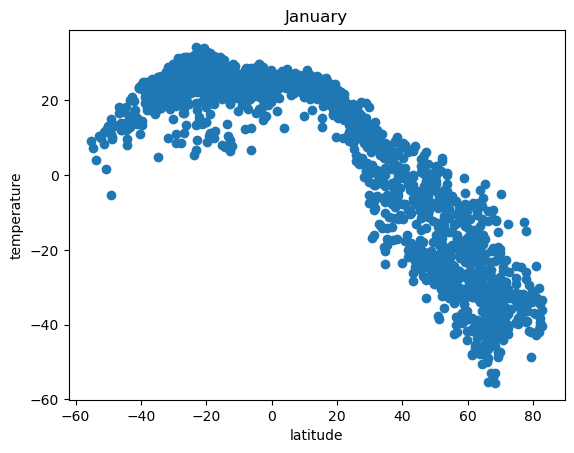

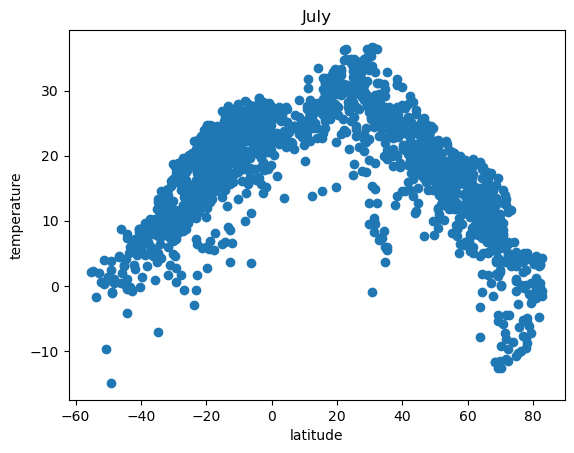

In [4]:
# Plot scatter plot
# 1. January
plt.scatter(data["latitude"], data["1"])
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.title("January")
plt.show()


# July
plt.scatter(data["latitude"], data["7"])
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.title("July")
plt.show()

Observation:

We find that the relationship between latitude and temperature in both January and July are highly non-linear.

# Problem 5.2

In [172]:
# Compute the LMMSE
def compute_lmmse(data_points, hemi="south"):

    latitude = data_points["latitude"]
    temperature = data_points["7"] if hemi == "south" else data_points["1"]

    cor = np.corrcoef(latitude, temperature)[0][1]
    mu_t = np.mean(temperature)
    mu_l = np.mean(latitude)
    std_t = np.std(temperature)
    std_l = np.std(latitude)

    def lmmse(l):
        return std_t * cor * ((l - mu_l) / std_l) + mu_t
    
    return lmmse


def axvlines(x, y_mins, y_maxs):
    y_mins = list(y_mins)
    y_maxs = list(y_maxs)
    for i, point in enumerate(x):
        plt.vlines(point, ymin = min(y_maxs[i],y_mins[i]), ymax = max(y_maxs[i],y_mins[i]))

# Plot data
def plot_data(data_points, lmmse, hemi="south"):
    
    predicted = list(map(lmmse, data_points["latitude"]))
    plt.plot(data_points["latitude"], predicted, color="orange")
    axvlines(data_points["latitude"], predicted, data_points["7"] if hemi == "south" else data_points["1"])
    
    plt.scatter(data_points["latitude"], data_points["7"] if hemi == "south" else data_points["1"])
    plt.plot(data_points["latitude"], data_points["7"] if hemi == "south" else data_points["1"], linestyle="", color="red")
    plt.xlabel("latitude")
    plt.ylabel("temperature")
    plt.show()


southern_data = data[data["latitude"] < 0]
northern_data = data[data["latitude"] > 0]


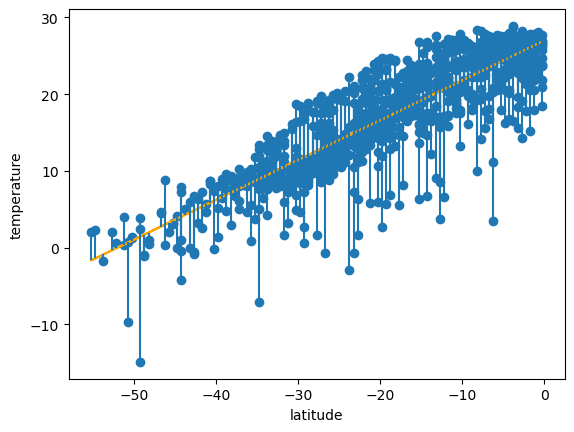

0.8539573093433421

In [174]:
lmmse_south = compute_lmmse(southern_data)
plot_data(southern_data, lmmse_south)
corr_south_july = np.corrcoef(southern_data["latitude"], southern_data["7"])[0][1]
corr_south_july

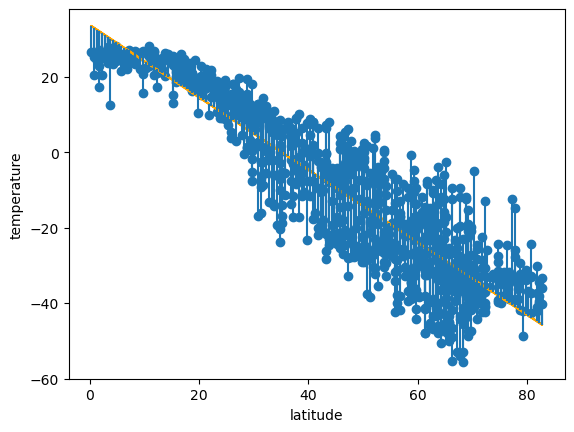

-0.7855494159376681

In [175]:
lmmse_north = compute_lmmse(northern_data, hemi="north")
plot_data(northern_data, lmmse_north, hemi="north")
corr_north_jan = np.corrcoef(northern_data["latitude"], northern_data["7"])[0][1]
corr_north_jan

# Problem 5.3

Observation: 

- As the correlation coefficient suggests, in the southern hemisphere in July, the higher the latitude is, the higher the temperature is. 

- As the correlation coefficient suggests, in the northern hemisphere in January, the lower the latitude is, the higher the temperature is. 
